In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/obesity-dataset/10.33484-sinopfbd.1445215-3764172.pdf
/kaggle/input/obesity-dataset/Obesity_Dataset.xlsx
/kaggle/input/obesity-dataset/Obesity_Dataset.arff
/kaggle/input/obesity-dataset/Obesity_Dataset/Obesity_Dataset/10.33484-sinopfbd.1445215-3764172.pdf
/kaggle/input/obesity-dataset/Obesity_Dataset/Obesity_Dataset/Obesity_Dataset.xlsx
/kaggle/input/obesity-dataset/Obesity_Dataset/Obesity_Dataset/Obesity_Dataset.arff


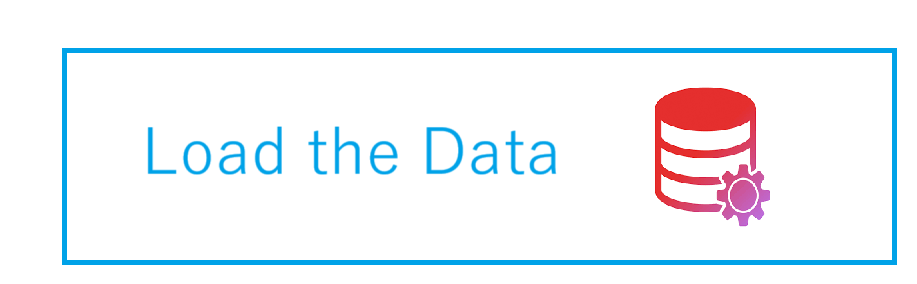

In [2]:
df=pd.read_excel("/kaggle/input/obesity-dataset/Obesity_Dataset.xlsx")

In [3]:
df

,Sex,Age,Height,Overweight_Obese_Family,Consumption_of_Fast_Food,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Food_Intake_Between_Meals,Smoking,Liquid_Intake_Daily,Calculation_of_Calorie_Intake,Physical_Excercise,Schedule_Dedicated_to_Technology,Type_of_Transportation_Used,Class
0,2,18,155,2,2,3,1,3,2,1,2,3,3,4,2
1,2,18,158,2,2,3,1,1,2,1,2,1,3,3,2
2,2,18,159,2,2,2,1,3,2,3,2,2,3,4,2
3,2,18,162,2,2,2,2,2,2,2,2,1,3,4,2
4,2,18,165,2,1,2,1,3,2,1,2,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,2,51,165,2,1,1,3,4,1,3,1,3,1,1,4
1606,2,51,163,2,1,2,2,4,2,2,2,5,1,1,4
1607,2,52,162,1,2,1,3,4,1,3,1,4,1,1,4
1608,2,53,168,2,1,1,3,4,1,2,2,2,1,1,4


In [4]:
df_temp = df.copy()

In [5]:
df.columns

Index(['Sex', 'Age', 'Height', 'Overweight_Obese_Family',
       'Consumption_of_Fast_Food', 'Frequency_of_Consuming_Vegetables',
       'Number_of_Main_Meals_Daily', 'Food_Intake_Between_Meals', 'Smoking',
       'Liquid_Intake_Daily', 'Calculation_of_Calorie_Intake',
       'Physical_Excercise', 'Schedule_Dedicated_to_Technology',
       'Type_of_Transportation_Used', 'Class'],
      dtype='object')

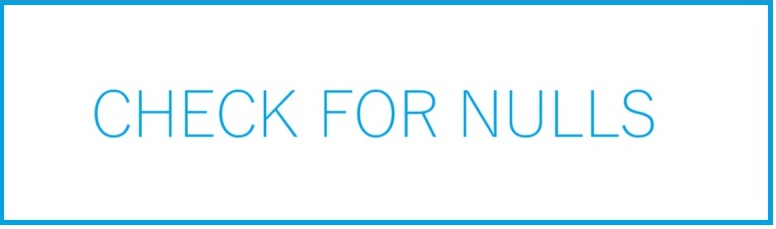

In [6]:
df.isnull().sum()

Sex                                  0
Age                                  0
Height                               0
Overweight_Obese_Family              0
Consumption_of_Fast_Food             0
Frequency_of_Consuming_Vegetables    0
Number_of_Main_Meals_Daily           0
Food_Intake_Between_Meals            0
Smoking                              0
Liquid_Intake_Daily                  0
Calculation_of_Calorie_Intake        0
Physical_Excercise                   0
Schedule_Dedicated_to_Technology     0
Type_of_Transportation_Used          0
Class                                0
dtype: int64

## GET THE CATEGORICAL AND DISCREET COLUMNS

In [7]:
categorical_columns=[col for col in df if len(df[col].unique())<=5]
discreet_columns=[col for col in df if len(df[col].unique())>5]


In [8]:
categorical_columns

['Sex',
 'Overweight_Obese_Family',
 'Consumption_of_Fast_Food',
 'Frequency_of_Consuming_Vegetables',
 'Number_of_Main_Meals_Daily',
 'Food_Intake_Between_Meals',
 'Smoking',
 'Liquid_Intake_Daily',
 'Calculation_of_Calorie_Intake',
 'Physical_Excercise',
 'Schedule_Dedicated_to_Technology',
 'Type_of_Transportation_Used',
 'Class']

In [9]:
discreet_columns

['Age', 'Height']

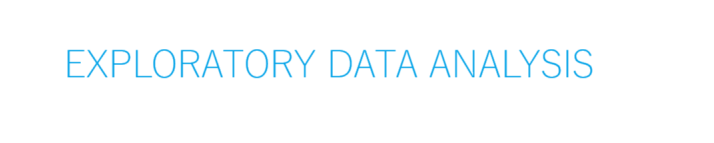

<Axes: >

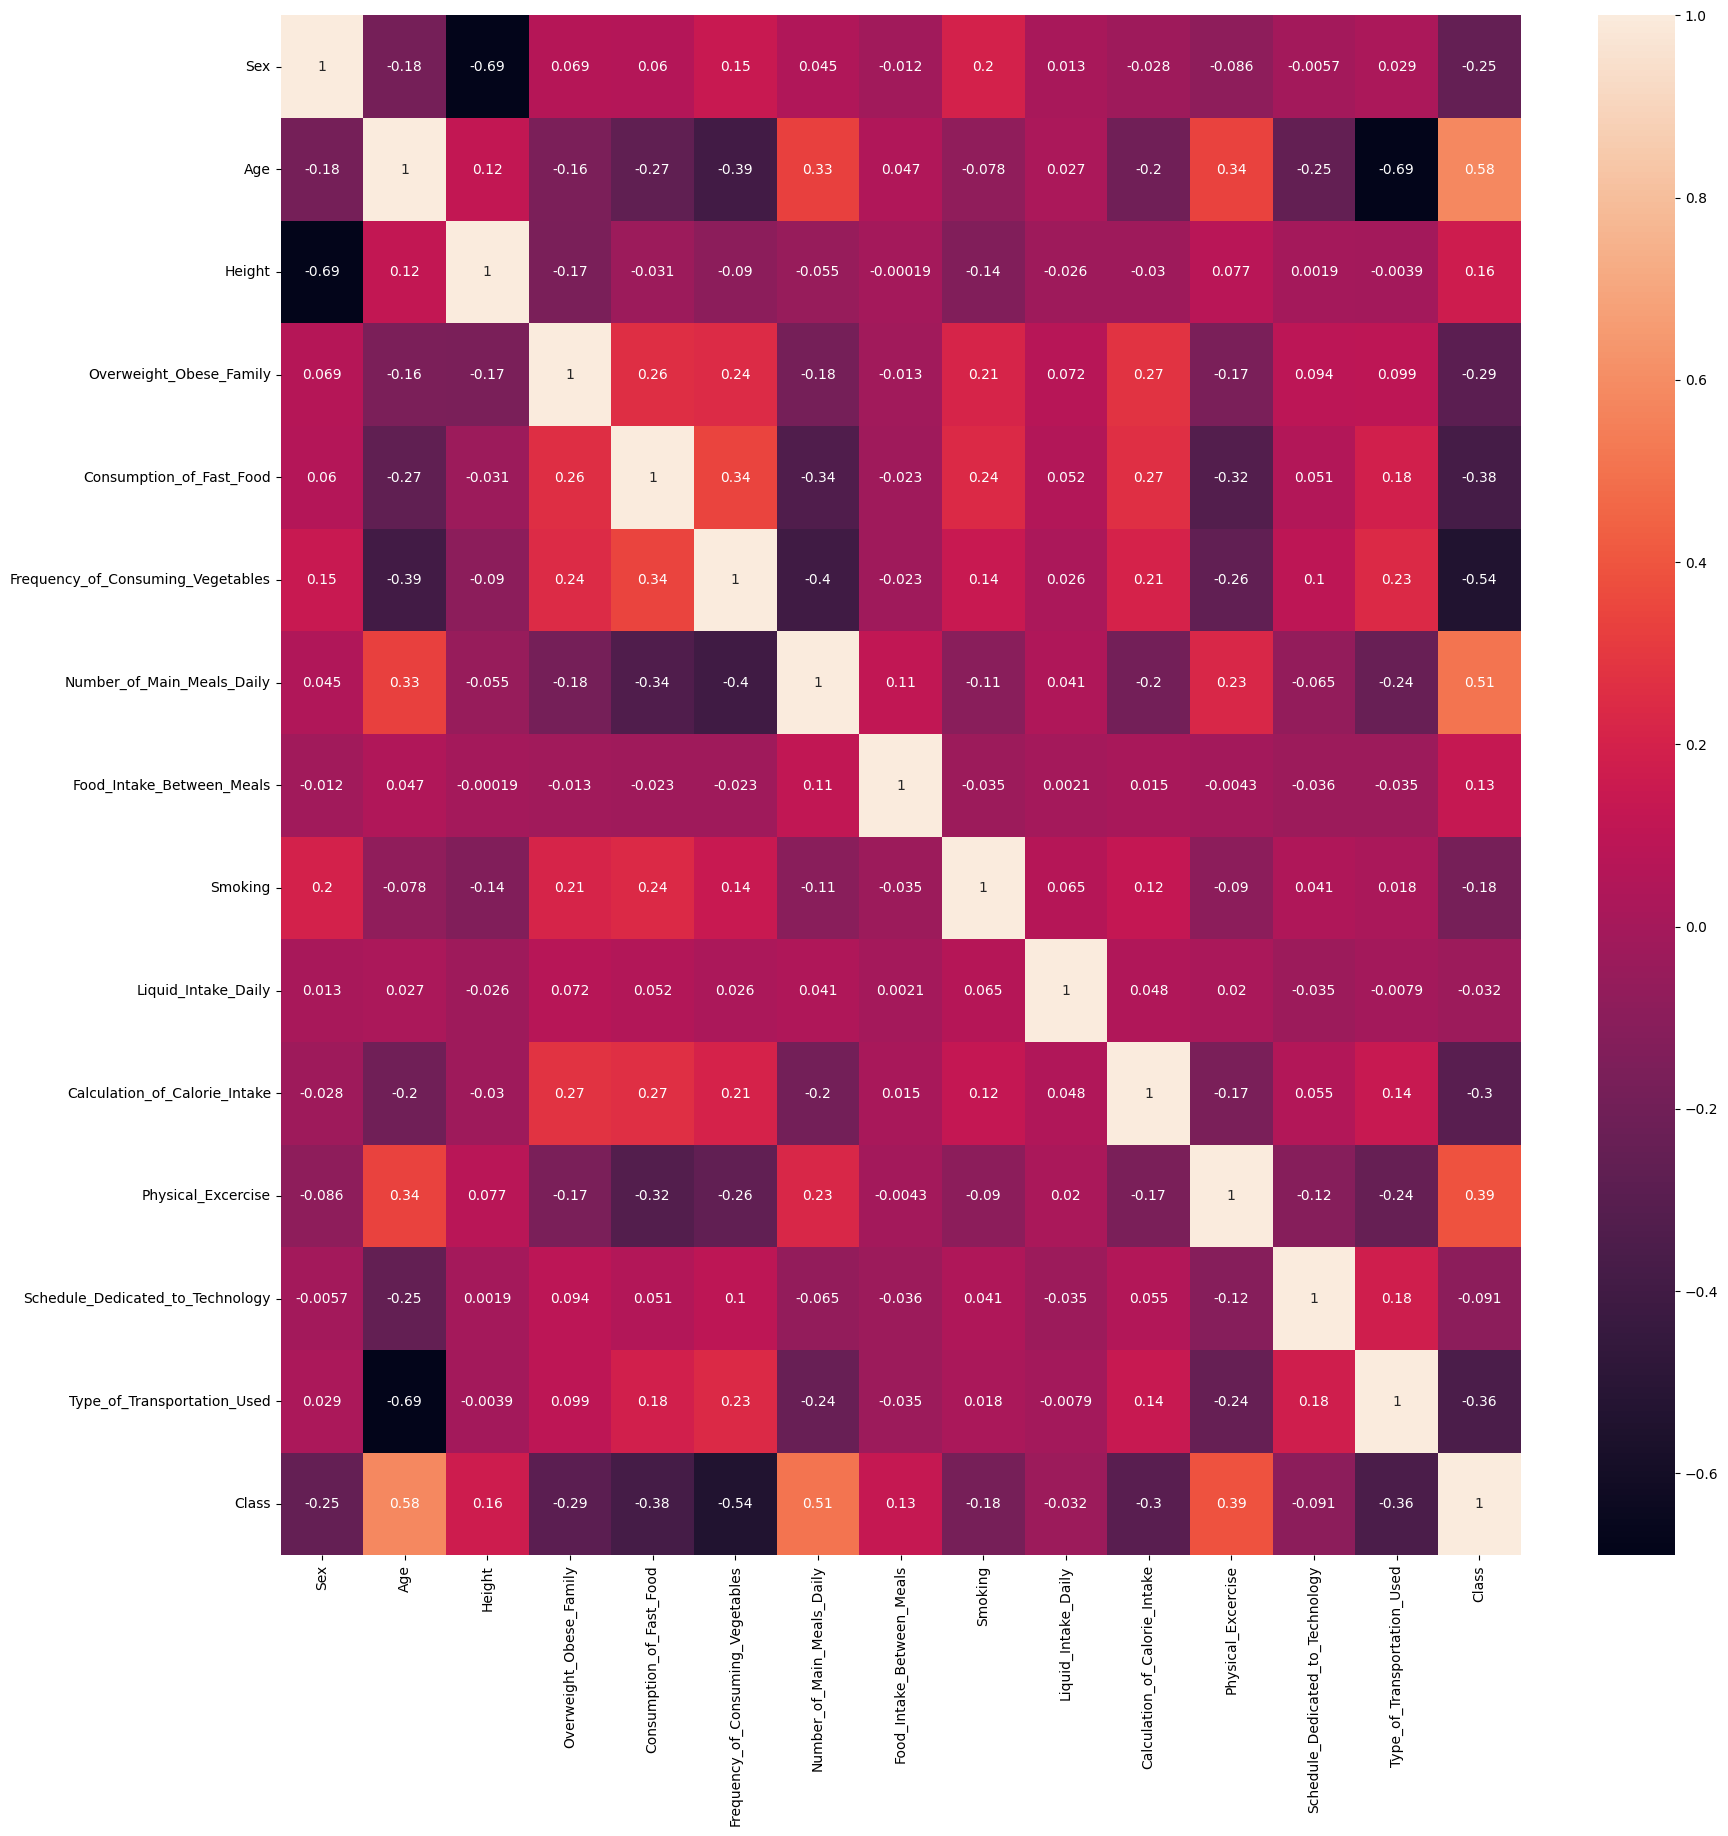

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

## None of the columns are Highly Correlated

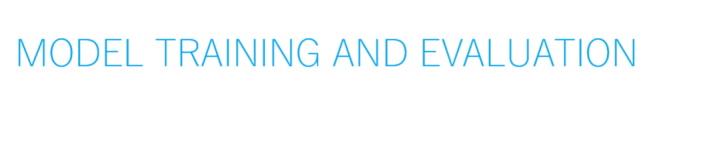

In [11]:
from sklearn.ensemble import RandomForestClassifier

rand = RandomForestClassifier()


## STANDARDIZING THE VALUE OF HEIGHT TO BRING TO A SMALLER SCALE

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Height']=scaler.fit_transform(df[['Height']])

### EXTRACT DEPENDENT AND INDEPENDENT FEATURES

In [13]:
X=df.drop(columns=['Class'])
Y=df['Class']

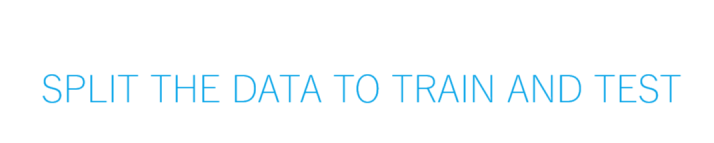

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,Y,test_size=0.25,random_state=42)

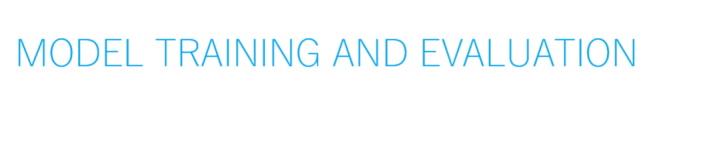

In [15]:
rand.fit(X_train,y_train)


RandomForestClassifier()

In [16]:
y_pred = rand.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.8411910669975186

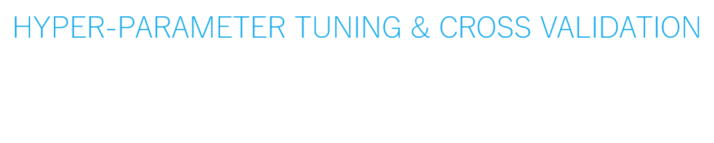

In [18]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [ 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

{'bootstrap': False, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

# Grid Search with Cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Test the model with the best parameters
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Evaluate the model
accuracy = best_rf.score(X_test, y_test)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

Best Hyperparameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Test Accuracy: 87.34%


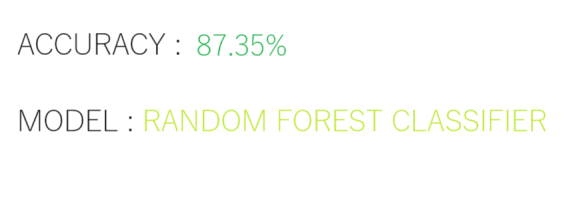